<a href="https://colab.research.google.com/github/ssktora/baseball-game/blob/main/baseball_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1球の勝負の関数を生成（コンピュータ）

In [1]:
import random
course = {"0":"内高め","1":"内低め","2":"外高め","3":"外低め"}
def match():
    com1 = str(random.randrange(4))
    com2 = str(random.randrange(4))
    if com1 == com2:
        roulette = random.randrange(100)
        if roulette in [x for x in range(3)]:#ホームラン
            return 4
        elif roulette in [x for x in range(3, 5)]:#スリーベースヒット
            return 3
        elif roulette in [x for x in range(5, 50)]:#アウト
            return "out"
        elif roulette in [x for x in range(50, 90)]:#ヒット
            return 1
        else:#ツーベースヒット
            return 2
    else:
        return "strike"

## １打席の勝負の関数を生成

In [2]:
def at_bat():
    strike_count = 0
    while strike_count < 3:
        one_ball = match()
        if one_ball == "strike":
            strike_count += 1
        else:
            return one_ball
    return "out"

## 走者に関する関数を生成

In [3]:
def pointer(num, a_list, point):
    for i in range(len(a_list)):
        a_list[i] = a_list[i] + num
    a_list.append(num)
    point_list  = [1 for x in a_list if x>=4]
    if len(point_list) >= 1:
        point += len(point_list)
        for i in range(len(point_list)):
            a_list.pop(0)
        point_list = []
    return a_list, point
        
def runner(a_list, point, result, count):
    if result == 4:
        a_list, point = pointer(4, a_list, point)
    elif result == 3:
        a_list, point = pointer(3, a_list, point)
    elif result == 2:
        a_list, point = pointer(2, a_list, point)
    elif result == 1:
        a_list, point = pointer(1, a_list, point)
    else:
        count += 1
    return a_list, point, count

## 1イニングの勝負の関数を生成

In [4]:
def inning_match():
    out_count = 0
    inning_point = 0
    runner_list = []
    while out_count != 3:
        result = at_bat()
        runner_list, inning_point, out_count = runner(runner_list, inning_point, result, out_count)
    return inning_point

## 1試合の勝負の関数を生成

In [5]:
def game():
    inning_count = 1
    player1_point = 0
    player2_point = 0
    while inning_count <= 8:
        player1_inning_point = inning_match()
        player1_point += player1_inning_point
        player2_inning_point = inning_match()
        player2_point += player2_inning_point
        inning_count += 1
    
    #9回表
    player1_inning_point = inning_match()
    player1_point += player1_inning_point
   
    #9回裏
    if player1_point > player2_point:
        player2_inning_point = inning_match()
        player2_point += player2_inning_point
    
    #10回
    if player1_point == player2_point:
        player1_inning_point = inning_match()
        player1_point += player1_inning_point
        player2_inning_point = inning_match()
        player2_point += player2_inning_point
    
    #11回
    if player1_point == player2_point:
        player1_inning_point = inning_match()
        player1_point += player1_inning_point
        player2_inning_point = inning_match()
        player2_point += player2_inning_point
    
    #12回
    if player1_point == player2_point:
        player1_inning_point = inning_match()
        player1_point += player1_inning_point
        player2_inning_point = inning_match()
        player2_point += player2_inning_point
    
    
    return player1_point, player2_point



# リーグ戦の試合の組み合わせを作る関数を生成
参考にしたページ：https://qiita.com/cabernet_rock/items/526d06a7993dfb61b75f

In [6]:
def Round_robin():

    match = []  # 試合の組み合わせを入れるリスト
    M=[i for i in range(6)]
    center = 3
    for i in range(6-1):
        match.append([(M[0+i],M[-1-i]) for i in range(center)])
        M = M[:1] + M[2:] + M[1:2] # 先頭を固定して１つずつずらす
    return match



    
    


## 1サイクルのリーグ戦の関数を生成(同一カード3連戦）

In [8]:
#それぞれのチームの結果リストに勝てば１負ければ0引き分けは２を挿入していく。

def winner(n, t, c, g, b, s, d):
    if n == 0:
        t.append(1)
    elif n == 1:
        c.append(1)
    elif n == 2:
        g.append(1)
    elif n == 3:
        b.append(1)
    elif n == 4:
        s.append(1)
    else:
        d.append(1)

def loser(n, t, c, g, b, s, d):
    if n == 0:
        t.append(0)
    elif n == 1:
        c.append(0)
    elif n == 2:
        g.append(0)
    elif n == 3:
        b.append(0)
    elif n == 4:
        s.append(0)
    else:
        d.append(0)

def draw(n, t, c, g, b, s, d):
    if n == 0:
        t.append(2)
    elif n == 1:
        c.append(2)
    elif n == 2:
        g.append(2)
    elif n == 3:
        b.append(2)
    elif n == 4:
        s.append(2)
    else:
        d.append(2)
        
def Reague_1cycle(t, c, g, b, s, d):
    match = Round_robin()
    
    for i in range(5):
        team1 = match[i][0][0]
        team2 = match[i][0][1]
        team3 = match[i][1][0]
        team4 = match[i][1][1]
        team5 = match[i][2][0]
        team6 = match[i][2][1]
        for j in range(3):
            team1_r, team2_r = game()
            if team1_r > team2_r:
                winner(team1, t, c, g, b, s, d)
                loser(team2, t, c, g, b, s, d)
            elif team1_r < team2_r:
                winner(team2, t, c, g, b, s, d)
                loser(team1, t, c, g, b, s, d)
            else:
                draw(team1, t, c, g, b, s, d)
                draw(team2, t, c, g, b, s, d)
            
            team3_r, team4_r = game()
            if team3_r > team4_r:
                winner(team3, t, c, g, b, s, d)
                loser(team4, t, c, g, b, s, d)
            elif team3_r < team4_r:
                winner(team4, t, c, g, b, s, d)
                loser(team3, t, c, g, b, s, d)
            else:
                draw(team3, t, c, g, b, s, d)
                draw(team4, t, c, g, b, s, d)
            
            team5_r, team6_r = game()
            if team5_r > team6_r:
                winner(team5, t, c, g, b, s, d)
                loser(team6, t, c, g, b, s, d)
            elif team5_r < team6_r:
                winner(team6, t, c, g, b, s, d)
                loser(team5, t, c, g, b, s, d)
            else:
                draw(team5, t, c, g, b, s, d)
                draw(team6, t, c, g, b, s, d)
    
    return t, c, g, b, s, d


                
                
            

## 1年間のリーグ戦の関数を生成

In [9]:
def Reague():
    tigers_result = []
    carp_result = []
    giants_result = []
    baystars_result = []
    swallows_result = []
    dragons_result = []
    for i in range(9):
        t = []
        c = []
        g = []
        b = []
        s = []
        d = []
        tigers, carp, giants, baystars, swallows, dragons = Reague_1cycle(t, c, g, b, s, d)
        tigers_result.extend(tigers)
        carp_result.extend(carp)
        giants_result.extend(giants)
        baystars_result.extend(baystars)
        swallows_result.extend(swallows)
        dragons_result.extend(dragons)
    
    return tigers_result, carp_result, giants_result, baystars_result, swallows_result, dragons_result


    

## 1年間のリーグ戦の戦いを可視化する(135試合制)

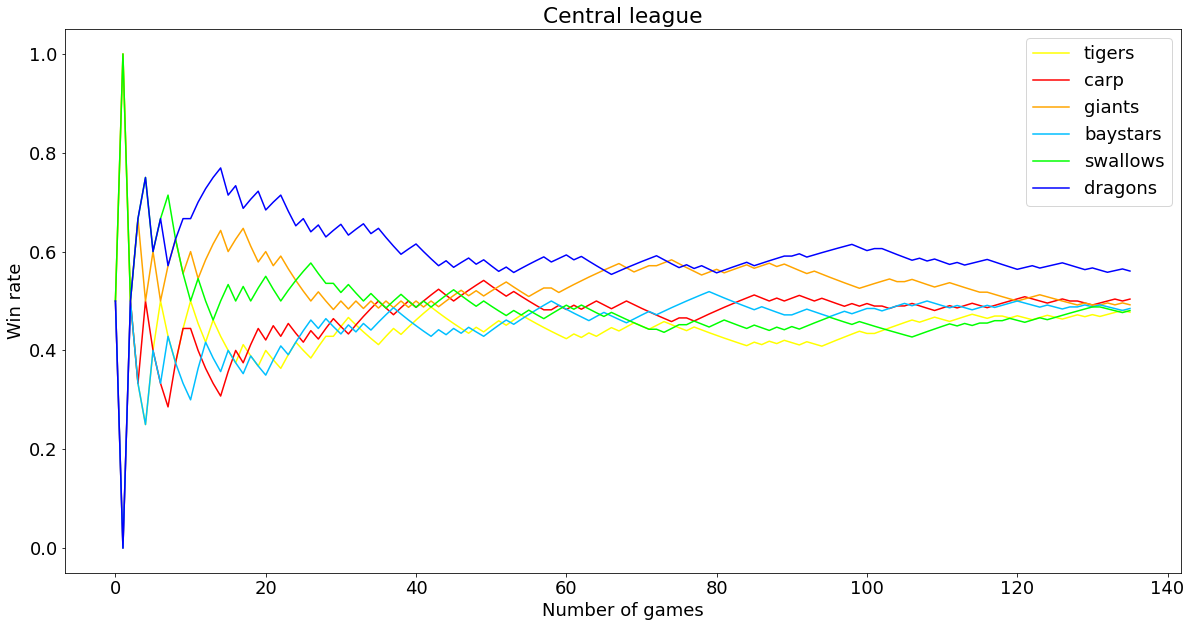

,勝,負,引,勝率
中日ドラゴンズ,74,58,3,0.560606
広島カープ,65,64,6,0.503876
読売ジャイアンツ,64,66,5,0.492308
横浜DeNAベイスターズ,64,68,3,0.484848
東京ヤクルトスワローズ,62,67,6,0.480620
阪神タイガース,63,69,3,0.477273


In [14]:
tigers, carp, giants, baystars, swallows, dragons = Reague()

cal_tigers = []
cal_carp = []
cal_giants = []
cal_baystars = []
cal_swallows = []
cal_dragons = []

def checker(a_list):
    if a_list.count(0)+a_list.count(1)!=0:
        return True
    else:
        return False
    
for i in range(len(tigers)):
    t_list = tigers[0:i+1]
    c_list = carp[0:i+1]
    g_list = giants[0:i+1]
    b_list = baystars[0:i+1]
    s_list = swallows[0:i+1]
    d_list = dragons[0:i+1]
    if i == 0:
        cal_tigers.append(0.5)
        cal_carp.append(0.5)
        cal_giants.append(0.5)
        cal_baystars.append(0.5)
        cal_swallows.append(0.5)
        cal_dragons.append(0.5)
        
    if checker(t_list):
        t_win = t_list.count(1)/(t_list.count(0)+t_list.count(1))
        cal_tigers.append(t_win) 
    else:
        cal_tigers.append(0.5)
    
    if checker(c_list):
        c_win = c_list.count(1)/(c_list.count(0)+c_list.count(1))
        cal_carp.append(c_win)
    else:
        cal_carp.append(0.5)
    
    if checker(g_list):
        g_win = g_list.count(1)/(g_list.count(0)+g_list.count(1))
        cal_giants.append(g_win)
    else:
        cal_giants.append(0.5)
    
    if checker(b_list):
        b_win = b_list.count(1)/(b_list.count(0)+b_list.count(1))
        cal_baystars.append(b_win)
    else:
        cal_baystars.append(0.5)
    
    if checker(s_list):
        s_win = s_list.count(1)/(s_list.count(0)+s_list.count(1))
        cal_swallows.append(s_win)
    else:
        cal_swallows.append(0.5)
        
    if checker(s_list):
        d_win = d_list.count(1)/(d_list.count(0)+d_list.count(1))
        cal_dragons.append(d_win)
    else:
        cal_dragons.append(0.5)

import pandas as pd
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
plt.plot(cal_tigers,label="tigers", color="yellow")
plt.plot(cal_carp, label="carp", color="red")
plt.plot(cal_giants, label="giants", color="orange")
plt.plot(cal_baystars, label="baystars", color="deepskyblue")
plt.plot(cal_swallows, label="swallows", color="lime")
plt.plot(cal_dragons, label="dragons", color="blue")
plt.xlabel("Number of games")
plt.ylabel("Win rate")
plt.title("Central league")
plt.rcParams["font.size"] = 18
plt.tick_params(labelsize=18)
plt.legend()
plt.show()


team_list = [ "阪神タイガース", "広島カープ", "読売ジャイアンツ", "横浜DeNAベイスターズ", "東京ヤクルトスワローズ", "中日ドラゴンズ"]
df = pd.DataFrame( {
"勝": pd.Series( [ tigers.count(1), carp.count(1), giants.count(1), baystars.count(1), swallows.count(1),dragons.count(1)], index = team_list),
"負": pd.Series( [ tigers.count(0), carp.count(0), giants.count(0), baystars.count(0), swallows.count(0),dragons.count(0)], index = team_list),
"引": pd.Series([ tigers.count(2), carp.count(2), giants.count(2), baystars.count(2), swallows.count(2), dragons.count(2)], index = team_list),
"勝率":pd.Series([cal_tigers[-1], cal_carp[-1], cal_giants[-1], cal_baystars[-1], cal_swallows[-1], cal_dragons[-1]], index = team_list)
} )
df_new = df.sort_values('勝率', ascending=False)
df_new